# Prospecção de Dados - Data Mining - DI/FCUL2022/2023

## Lab class TP03

# Dimensionality Reduction - Sparse matrices, PCA and SVD

*A Data Mining Tutorial by Andre Falcao (DI/FCUL 2021-2023)*


In [2]:
import numpy as np
import pickle
from random import randint, seed
import matplotlib.pyplot as plt

## Sparse Matrices

many times matrices are very sparse and a numpy array is not a convenient way to handle it as most entries are Zero. This is the typical case for words on a set of documents, transactions in market basket analysis, or preferences of products according to users.

If Python Lists and dictionaries are sometimes convenient for basic computations, theuy are not efficient to matrix type calculations that can be accomplished much more easily in specialized matrix processing libraries, like numpy or scipy

### Introducing Scipy sparse matrices

The popular [scipy library](https://docs.scipy.org/doc/scipy/index.html)  implements many needed functions and different ways of storing [sparse data](https://docs.scipy.org/doc/scipy/reference/sparse.html) that can be used is a very similar way as numpy arrays, and easily converted

There are several types of sparse arrays that we can consider, although several others 

* dok_array - dictionary of keys - very convenient to process python dictionaries or lists
* lil_array - Lists of lists
* csr_array - compressed sparse row array - for each row, the column indexes are stored separately
* csc_array - compressed sparse column array - for each column, the row indexes are stored separately

The last two are the most convenient for matrix operations (dot products, inversions, et al) 

Let's start with a sample matrix of 20 x 10 with only 30 no-zero values

In [2]:
N,M=20,10
seed(123)
data = np.zeros([N, M], dtype=int)
for i in range(30): data[randint(0, N-1), randint(0, M-1)]=randint(1,5)
data

array([[0, 0, 0, 0, 2, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [4, 0, 1, 0, 0, 0, 0, 2, 0, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 5, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 1, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 3, 0, 0, 4],
       [0, 2, 0, 0, 0, 5, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

To check the size of the array we can do the following

In [4]:
import sys
print("Data size of np.array", sys.getsizeof(data), "bytes")


Data size of np.array 928 bytes


This method sometimes does not work. Especially for objects with allocated memory not in Python. A more robust approach is serializing the data with pickle to a python binary object and check its size

In [5]:
ob_data=pickle.dumps(data)
print("Data size of serialization of np.array", sys.getsizeof(ob_data), "bytes")

Data size of serialization of np.array 985 bytes


### Converting Numpy arrays  to Scipy sparse matrices

We can convert any numpy array into a scipy sparse matrix in any of the available formats. Sparse matrices can be converted back into numpy arrays using the `.toarray()` method

In [3]:
from scipy.sparse import dok_array, csr_array, csc_array, bsr_array, lil_array
S_csc=csc_array(data)
S_csr=csr_array(data)
S_bsr=bsr_array(data)
S_lil=lil_array(data)


NameError: name 'data' is not defined

Due to the complexity of the sparse matrix format using `sys.getsizeof` will get us weird results, so we will use the pickle serialization method 

In [7]:
csc=pickle.dumps(S_csc)
csr=pickle.dumps(S_csr)
bsr=pickle.dumps(S_bsr)
lil=pickle.dumps(S_lil)
print("Data size of serialization of csc_array is:", sys.getsizeof(csc), "bytes")
print("Data size of serialization of csr_array is:", sys.getsizeof(csr), "bytes")
print("Data size of serialization of bsr_array is:", sys.getsizeof(bsr), "bytes")
print("Data size of serialization of lil_array is:", sys.getsizeof(lil), "bytes")


Data size of serialization of csc_array is: 599 bytes
Data size of serialization of csr_array is: 639 bytes
Data size of serialization of bsr_array is: 643 bytes
Data size of serialization of lil_array is: 569 bytes


### Converting sparse matrices back into numpy arrays

Any sparse matrix can be converted easily into an array, although some care must be taken as the memory might not be enough

In [8]:
print(S_csc.toarray())

[[0 0 0 0 2 3 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [4 0 1 0 0 0 0 2 0 4]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [2 0 1 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 5 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 1 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 3 3 0 0 4]
 [0 2 0 0 0 5 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


#### Exercises
The advantage of sparse matrices for this example does not look very impressive. 
1. Make a new data vector of dimensions 20000 x 100, with 3000 non zero values
2. Compute the size of each new sparse matrix
3. Make a new data vector of dimensions 100 x 20000, with 3000 non zero values and repeat the computation of the size of the sparse matrices
4. Comment the results 

In [16]:
#sol Ex 1

m = np.zeros((20000,100))
rows = np.random.choice(list(range(0, 20000)), size=3000, replace=False)
cols = np.random.choice(list(range(0, 100)), size=3000, replace=True)

for r, c in zip(rows,cols):
    m[r,c] = randint(0,10000)
    
S_csc=csc_array(m)
S_csr=csr_array(m)
S_bsr=bsr_array(m)
S_lil=lil_array(m)

In [18]:
md = pickle.dumps(m)
csc=pickle.dumps(S_csc)
csr=pickle.dumps(S_csr)
bsr=pickle.dumps(S_bsr)
lil=pickle.dumps(S_lil)

In [19]:
#sol Ex 2
print(f"Numpy: {sys.getsizeof(md)} bytes")
print(f"Compressed Columns: {sys.getsizeof(csc)} bytes")
print(f"Compressed Rows: {sys.getsizeof(csr)} bytes")
print(f"Compressed Blocks: {sys.getsizeof(bsr)} bytes")
print(f"List of Lists: {sys.getsizeof(lil)} bytes")


Numpy: 16000195 bytes
Compressed Columns: 36789 bytes
Compressed Rows: 116399 bytes
Compressed Blocks: 116403 bytes
List of Lists: 119427 bytes


In [20]:
#sol Ex 3
#sol Ex 1

m = np.zeros((100,20000))
cols = np.random.choice(list(range(0, 20000)), size=3000, replace=False)
rows = np.random.choice(list(range(0, 100)), size=3000, replace=True)

for r, c in zip(rows,cols):
    m[r,c] = randint(0,10000)
    
S_csc=csc_array(m)
S_csr=csr_array(m)
S_bsr=bsr_array(m)
S_lil=lil_array(m)


In [21]:
md = pickle.dumps(m)
csc=pickle.dumps(S_csc)
csr=pickle.dumps(S_csr)
bsr=pickle.dumps(S_bsr)
lil=pickle.dumps(S_lil)

In [22]:
print(f"Numpy: {sys.getsizeof(md)} bytes")
print(f"Compressed Columns: {sys.getsizeof(csc)} bytes")
print(f"Compressed Rows: {sys.getsizeof(csr)} bytes")
print(f"Compressed Blocks: {sys.getsizeof(bsr)} bytes")
print(f"List of Lists: {sys.getsizeof(lil)} bytes")


Numpy: 16000195 bytes
Compressed Columns: 116399 bytes
Compressed Rows: 36789 bytes
Compressed Blocks: 36793 bytes
List of Lists: 37107 bytes


### Testing sparse matrices on a real world dataset

For a larger scale assessment of sparse matrices we are going to load the words processed from TP01 for the wikipedia dataset

In [4]:
import pickle
words_text_sets, all_words = pickle.load(open("wikipedia1.pickle", "rb"))

print("N. of documents: ", len(words_text_sets))
print("N. of unique words:",  len(all_words))
N, M= len(words_text_sets), len(all_words)

N. of documents:  14679
N. of unique words: 243490


A matrix of size 14,679 x 243,490 would be impractical to store in a numpy array (do not try it unless you are certain you have plenty of RAM)

In [24]:
large_array = np.zeros([N,M], dtype=np.int8)
print("Data size of np.array (in MB)", sys.getsizeof(large_array)/(1024*1024))

Data size of np.array (in MB) 3408.6130504608154


Yet we can take advantage of scipy `dok` sparse matrices that are easily incrementally updated to build our own word-document matrix already filled, which can be easily converted into all other sparse matrices

In [25]:
def make_sparse_matrix(docs, words):
    N = len(docs)
    M = len(words)
    D=dict(zip(all_words, range(len(all_words))))
    S_mat = dok_array((N, M), dtype=np.int8)
    for i in range(N):
        word_idxs=np.array([D[w] for w in words_text_sets[i]])
        #print(word_idxs[:10])
        S_mat[i,word_idxs]=1
    return S_mat

dok_matrix = make_sparse_matrix(words_text_sets, all_words)

we can verify the size of it by serializing it

In [32]:
dok=pickle.dumps(dok_matrix)
print("Data size of DOK sparse matrix (in MB)", sys.getsizeof(dok)/(1024*1024))

Data size of DOK sparse matrix (in MB) 42.30705261230469


In [29]:
dok_matrix.shape

(14679, 243490)

Yet DOK sparse matrices, if they are practical for data loading, they can be very inconvenient for any type of matrix processing so they need to be converted into CSR or CSC formats

In [30]:
S_csr=csr_array(dok_matrix)
p_csr=pickle.dumps(S_csr)
print("Data size of CSR sparse matrix (in MB)", sys.getsizeof(p_csr)/(1024*1024))

Data size of CSR sparse matrix (in MB) 10.939128875732422


In [47]:
S_csr

<14679x243490 sparse array of type '<class 'numpy.int8'>'
	with 2282275 stored elements in Compressed Sparse Row format>

Our dataset of 3.4 GB suddenly became ~11 MB, without any loss of information

## Dimensionality reduction 

### Principal Components Analysis


First let's create a training set and a testing set from the diabetes dataset

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes=load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=0)

As we know Principal components analysis is essentially the eingenvalues/eigenvectors of the $ X^T.X $ which is related to the covariance matrix. So we can just use the builtin numpy `eig` method to do all the work

In [34]:
X_train.shape

(296, 10)

In [45]:
n_comps=2
W, v = np.linalg.eig(X_train.T @ X_train)
vexp = W/W.sum()

tve=0
for i, ve in enumerate(vexp[:n_comps]):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )    

print()

print("Actual Eigenvalues:", W[:n_comps])
for i,comp in enumerate(v[:,:n_comps].T):
    print("PC",i, "-->", comp)


PC0 - Variance explained:  0.4223 - Total Variance:  0.4223
PC1 - Variance explained:  0.1390 - Total Variance:  0.5613

Actual Eigenvalues: [2.92072685 0.96116055]
PC 0 --> [ 0.22448564  0.16973469  0.30133641  0.28718052  0.33053737  0.33830976
 -0.28722032  0.41868114  0.37464202  0.35449337]
PC 1 --> [ 0.15815758 -0.40581392 -0.10845277 -0.07521348  0.55471144  0.40127546
  0.54951636 -0.12615344  0.01755403 -0.0772291 ]


In [43]:
s = i = 0
while s <= 0.9:
    s+=vexp[i]
    i+=1
print(s, i)


0.948989280519739 7


We can compare our results with the official scikit-learn approach. Running the same data with scikit learn we get:

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()
print("Actual Eigenvalues:", pca.singular_values_)
for i,comp in enumerate(pca.components_):
    print("PC",i, "-->", comp)
    

PC0 - Variance explained:  0.4224 - Total Variance:  0.4224
PC1 - Variance explained:  0.1390 - Total Variance:  0.5614

Actual Eigenvalues: [1.70882759 0.98023199]
PC 0 --> [ 0.22452311  0.17011302  0.30125576  0.28754873  0.3304422   0.33811708
 -0.28709559  0.41864325  0.37460552  0.35451526]
PC 1 --> [ 0.15942489 -0.40467003 -0.10862825 -0.07332126  0.55461976  0.40055909
  0.55072724 -0.12697082  0.01754897 -0.0766098 ]


#### Exercise
1. intepret the results above. 
    * **Do not even leave this exercise until this is fully understood!**
2. Verify the differences in results between numpy and sklearn and explain them


Now let's project the data using the principal components defined and use them for regression

In [58]:
X_train_transf = X_train @ v[:n_comps,:].T
X_train_transf.shape

(296, 2)

### A graphical view of PCA projection illustrated with regression data

Let's examine the projection in 2 components Notice the gradients in color for  each instance

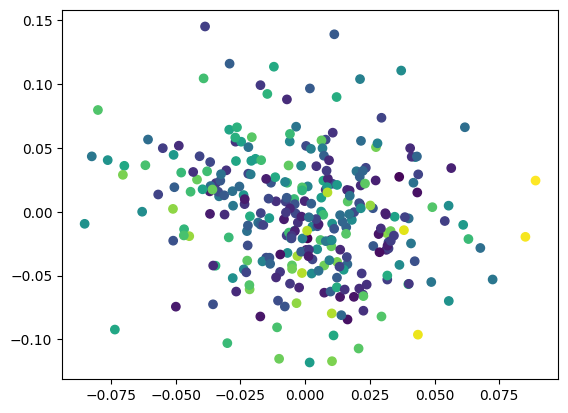

In [59]:
plt.scatter(X_train_transf[:,0], X_train_transf[:,1], c = y_train)
plt.show()

#### Exercises

1. try linear regression with the projected training and test sets
2. check how many componets are necessary for getting acceptable results
3. Discuss how this approach might be more/less adequate in a big data envionment

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error, mean_squared_error

In [61]:
y_train[:5]

array([ 96., 125., 182., 177.,  48.])

Max error = 155.31545435384425
RMSE = 55.4360721330851


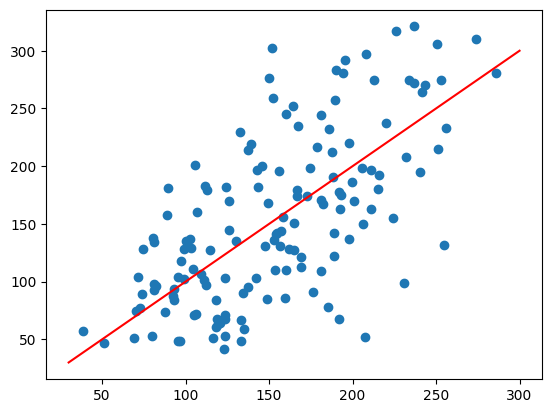

In [70]:
pca = PCA(n_components=7)
pca.fit(X_train)

m = LinearRegression().fit(pca.transform(X_train), y_train)
preds = m.predict(pca.transform(X_test))

print(f"Max error = {max_error(y_test, preds)}")
print(f"RMSE = {mean_squared_error(y_test, preds, squared=False)}")

plt.scatter(preds, y_test)
plt.plot([30, 300], [30, 300], c="r")

## SVD decomposition

SVD decomposes any data matrix into a product of 3 other matrices U, S and V. Both U and V are orthonormal matrices, meaning that each row or column element is independent of the others 

We are going to make a simple verification of the SVD decomposition algorithm with a very simple recomendation dataset with 7 users and 5 movies



In [72]:
lines=open("movies.txt", "rt").readlines()
movies=lines[0].strip().split()
users=[]
data=[]
for line in lines[1:]:
    fs=line.strip().split()
    users.append(fs[0])
    data.append([int(v) for v in fs[1:]])
data=np.array(data)
print("Users:", users)
print("Movies:", movies)

print(data)

Users: ['Alice', 'Bob', 'Charlie', 'Diane', 'Eddie', 'Fanny', 'Gustav']
Movies: ['Matrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
[[5 5 5 0 1]
 [4 5 5 2 1]
 [5 4 4 1 0]
 [5 4 3 2 1]
 [1 1 0 5 5]
 [1 0 1 4 5]
 [2 2 2 5 4]]


In the first place we will simply use the [numpy SVD decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to compute the 3 matrices U, S and V. The basic idea is that each of these matrices relate one of the aspects of the data to "embedded concepts". Each embedded concept

* U is a matrix that reflects how each row relates to each embedded concept
* V is a matrix that reflects how each column relates to each embedded concept
* S is a diagonal matrix that reflects the importance of each concept

In [74]:
u,s,v =np.linalg.svd(data)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

print("U:")
print(u)
print("S:")
print(np.diag(s))
print("V:")
print(v)

U:
[[-0.461  0.326  0.472  0.419 -0.381 -0.1    0.356]
 [-0.47   0.18   0.326 -0.632 -0.038  0.211 -0.442]
 [-0.407  0.276 -0.304  0.113  0.47  -0.631 -0.183]
 [-0.416  0.123 -0.631  0.217 -0.084  0.599  0.009]
 [-0.245 -0.578 -0.207  0.022 -0.598 -0.356 -0.278]
 [-0.223 -0.518  0.367  0.45   0.462  0.243 -0.269]
 [-0.345 -0.409 -0.047 -0.402  0.233 -0.037  0.703]]
S:
[[17.358  0.     0.     0.     0.   ]
 [ 0.    10.005  0.     0.     0.   ]
 [ 0.     0.     1.83   0.     0.   ]
 [ 0.     0.     0.     1.55   0.   ]
 [ 0.     0.     0.     0.     0.919]]
V:
[[-0.545 -0.511 -0.486 -0.347 -0.292]
 [ 0.243  0.273  0.267 -0.612 -0.648]
 [-0.516 -0.027  0.631 -0.392  0.425]
 [ 0.573 -0.338 -0.202 -0.528  0.488]
 [ 0.223 -0.741  0.503  0.269 -0.276]]


We can see clearly  that the first two "embedded concepts" have a  much larger value, which demonstrates the essential trends naturally present in this toy data set: Sci-fi vs Romance

In [75]:
for i in range(len(s)):
    print("first %d components have a combined importance of %7.4f" %(i+1, s[:i+1].sum()/s.sum()))

first 1 components have a combined importance of  0.5482
first 2 components have a combined importance of  0.8642
first 3 components have a combined importance of  0.9220
first 4 components have a combined importance of  0.9710
first 5 components have a combined importance of  1.0000


SVD is particularly useful as we can select only some selected components and have a very clear representation of the full dataset

For example as only 2 concepts represent about 86% of the data we can easily trim our resulting matrices, that with only a fraction of the data we can represent quite well the full dataset


In [88]:
r=2
U = u[:,:r]
S = np.diag(s[:r]) #presented in matrix diagonal format
V = v[:r, :]

print("U:")
print(U)
print("S:")
print(S)
print("V:")
print(V)

U:
[[-0.461  0.326]
 [-0.47   0.18 ]
 [-0.407  0.276]
 [-0.416  0.123]
 [-0.245 -0.578]
 [-0.223 -0.518]
 [-0.345 -0.409]]
S:
[[17.358  0.   ]
 [ 0.    10.005]]
V:
[[-0.545 -0.511 -0.486 -0.347 -0.292]
 [ 0.243  0.273  0.267 -0.612 -0.648]]


We can see that selecting only two components is able to almost produce the original matrix

In [77]:
print(U @ S @ V)

[[5.152 4.984 4.762 0.776 0.219]
 [4.876 4.659 4.443 1.727 1.214]
 [4.516 4.364 4.169 0.758 0.27 ]
 [4.228 4.025 3.836 1.746 1.305]
 [0.907 0.594 0.523 5.017 4.993]
 [0.852 0.569 0.504 4.517 4.492]
 [2.266 1.945 1.82  4.58  4.399]]


In [79]:
print(np.round(U @ S @ V))

[[5. 5. 5. 1. 0.]
 [5. 5. 4. 2. 1.]
 [5. 4. 4. 1. 0.]
 [4. 4. 4. 2. 1.]
 [1. 1. 1. 5. 5.]
 [1. 1. 1. 5. 4.]
 [2. 2. 2. 5. 4.]]


In [78]:
data

array([[5, 5, 5, 0, 1],
       [4, 5, 5, 2, 1],
       [5, 4, 4, 1, 0],
       [5, 4, 3, 2, 1],
       [1, 1, 0, 5, 5],
       [1, 0, 1, 4, 5],
       [2, 2, 2, 5, 4]])

We can further acount for the quality of the transformation, by computing the MSE relative to the original dataset

In [80]:
MSE=((data - U @ S @ V)**2).mean()
print("The MSE with %d components is: %7.4f" % (r, MSE))

The MSE with 2 components is:  0.1884


#### Exercises
* Check out the MSE relative to the original matrix as the value of grows from 1 to 5
* Discuss your results
* Compare your result with PCA

### Visualising the dataset in a reduced number of dimensions

As we have only two concept dimensions we can make scatter plots to inspect the persons and the movies in the new concept space

In [81]:
for r in range(1, 6):
    U = u[:,:r]
    S = np.diag(s[:r]) #presented in matrix diagonal format
    V = v[:r, :]
    
    MSE=((data - U @ S @ V)**2).mean()
    print("The MSE with %d components is: %7.4f" % (r, MSE))

The MSE with 1 components is:  3.0486
The MSE with 2 components is:  0.1884
The MSE with 3 components is:  0.0928
The MSE with 4 components is:  0.0242
The MSE with 5 components is:  0.0000


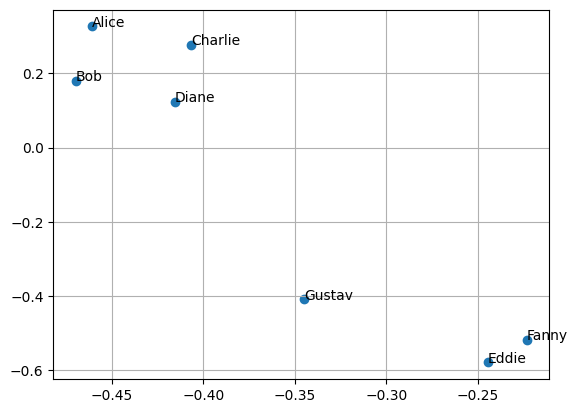

In [89]:
N,M=data.shape
plt.scatter(U[:,0], U[:,1])
for i, txt in enumerate(users):
    plt.annotate(txt, (U[i,0], U[i,1]))
plt.grid()
plt.show()

### Projecting new users into the concept space

We can project a new user into the concept space and understand wher it actually stands

In [90]:
Zack=np.array([0,3, 0, 0, 0])
p=Zack @ V.T
print("Projection of Zack into Concept space:", p)


Projection of Zack into Concept space: [-1.534  0.819]


We can have even some movie recommendations by analyzing the scores of each movie by multplying the projected element into the movies

In [91]:

#Recommended movies
recs= p @ V
print("Projected predicted scores", recs)

Projected predicted scores [ 1.035  1.008  0.964  0.031 -0.083]


So Zack will probably prefer one of first 3 movies

### Plotting the movies into concept space

We can use the V matrix to see how each movie relates to others according to its reviewrs preferences

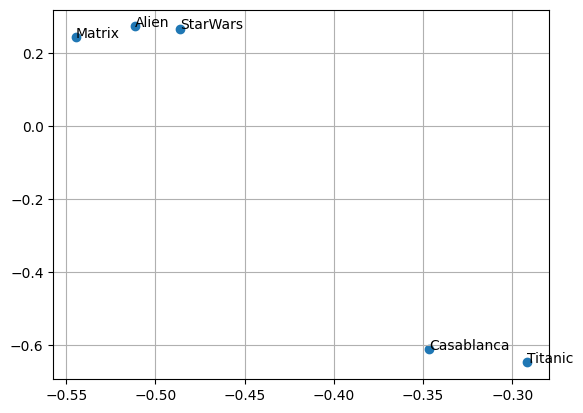

In [92]:
plt.scatter(V[0,:], V[1,:])
for i, txt in enumerate(movies):
    plt.annotate(txt, (V[0,i], V[1,i]))
plt.grid()
plt.show()

### SVD applications - The Reviews dataset
We will use  data set from Kaggle, related to [Amazon book reviews](https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis) This datase has been transformed and extraced so that each product would have at most two reviews from productive reviewers

In [9]:
from scipy.sparse import dok_array, csr_array, csc_array, bsr_array, lil_array
import numpy as np
import matplotlib.pyplot as plt

In [10]:
lines=open("amzn_revs.txt", "rt").readlines()
prods={}
users={}
reviews={}
c_prods, c_users= 0, 0

for lin in lines:
    prod, user, rev=lin.split()
    if prod in prods: 
        pid=prods[prod]
    else:
        pid=c_prods
        prods[prod]=c_prods
        c_prods+=1
    if user in users: 
        uid=users[user]
    else:
        uid=c_users
        users[user]=c_users
        c_users+=1
    reviews[(uid, pid)]=int(rev)

print("N_reviews:", len(reviews))
print("N_Users:",   len(users))
print("N_Prods:",   len(prods))

N_reviews: 1094
N_Users: 378
N_Prods: 549


Let's make a matrix of `Users vs Products`

In [11]:
N = len(users)
M = len(prods)
Data = np.zeros([N,M], dtype=float)
for u, p in reviews: 
    Data[u,p]=reviews[(u,p)]
    #print(u,p, reviews[(u,p)])

#check first 10 rows and 10 products
Data[:10, :10]

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 4., 0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 5., 0., 0., 5., 5., 5., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 4., 0., 0., 0., 0., 0., 5., 4., 0.],
       [0., 0., 0., 0., 4., 0., 0., 0., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

We can make a SVD decomposition of the actual dataset as before

In [12]:
u,s,v =np.linalg.svd(Data)
u.shape, v.shape, s.shape

((378, 378), (549, 549), (378,))

And we can actually view the results sorted by the importance of the s matrix

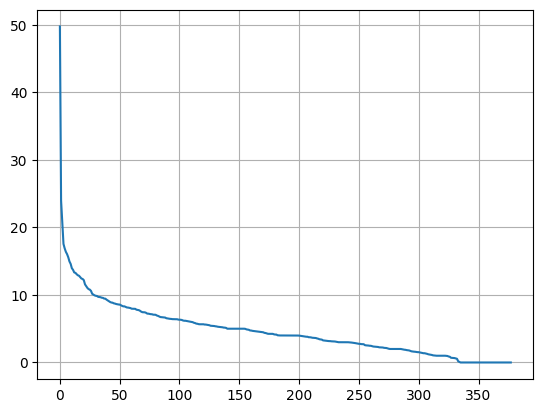

In [13]:
plt.plot(s)
plt.grid()
plt.show()

In [14]:
(s/s.sum())

array([2.76842557e-02, 1.33401372e-02, 1.14839354e-02, 9.76817301e-03,
       9.40239953e-03, 9.11535176e-03, 8.92661659e-03, 8.66637654e-03,
       8.32292711e-03, 8.12228035e-03, 7.76558448e-03, 7.63224086e-03,
       7.41474674e-03, 7.38533621e-03, 7.27486651e-03, 7.18666765e-03,
       7.14386427e-03, 7.02503120e-03, 6.91643189e-03, 6.88098343e-03,
       6.78122519e-03, 6.43545136e-03, 6.29257005e-03, 6.14112863e-03,
       6.04438765e-03, 6.00274429e-03, 5.89777007e-03, 5.65917982e-03,
       5.59208053e-03, 5.52811667e-03, 5.49387412e-03, 5.47547127e-03,
       5.40796059e-03, 5.39053996e-03, 5.37747897e-03, 5.33561969e-03,
       5.32429254e-03, 5.26308098e-03, 5.25753685e-03, 5.17535333e-03,
       5.11124594e-03, 5.04418587e-03, 4.98280596e-03, 4.93969075e-03,
       4.92757267e-03, 4.87500853e-03, 4.85428304e-03, 4.81738605e-03,
       4.79297126e-03, 4.77747287e-03, 4.77152632e-03, 4.71832685e-03,
       4.66310385e-03, 4.62353394e-03, 4.62330280e-03, 4.57910880e-03,
      

Actually a much more convenient way would be to use sparse matrices for the actual SVD computation. Scipy SVD function allows to specify beforehand the number of elements required. Even though they will be the largest elements, the sorting order may not be guarateed, and the order is reversed

Here we will get just the first 50 components

In [97]:
n_comps=50
S_csr = csr_array(Data, dtype=float)
from scipy.sparse.linalg import eigs, svds
V,S,U  = svds(S_csr, k=n_comps)

V.shape, S.shape, U.shape

((378, 50), (50,), (50, 549))

In [98]:
S

array([ 8.585,  8.613,  8.657,  8.723,  8.76 ,  8.855,  8.877,  8.954,
        9.064,  9.185,  9.3  ,  9.448,  9.458,  9.568,  9.588,  9.663,
        9.687,  9.718,  9.839,  9.872,  9.934, 10.049, 10.169, 10.598,
       10.787, 10.862, 11.036, 11.308, 11.564, 12.186, 12.365, 12.429,
       12.624, 12.837, 12.914, 13.073, 13.271, 13.324, 13.715, 13.955,
       14.596, 14.956, 15.573, 16.041, 16.38 , 16.896, 17.553, 20.636,
       23.972, 49.748])

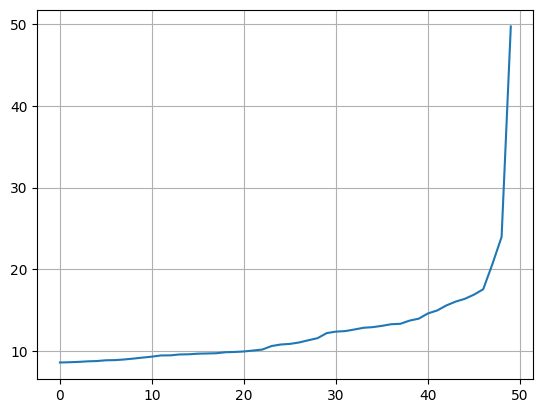

In [99]:
plt.plot(S)
plt.grid()
plt.show()